# Anomaly Detection Simulation #

This notebook explores the performance of anomaly detection method with tensor decomposition and robust statistics.

In [1]:
import os 
import numpy as np 

import TrafficData_Generator as Traffic 
import RTPCA
from scipy.io import loadmat, savemat

import matplotlib.pyplot as plt 

nyc_traffic = loadmat('D:\\OneDrive - Michigan State University\\Documents\\Anomaly Detection\\RobustTensor\\Data\\NYC_Taxi.mat')
rawdata = nyc_traffic['Y']
rawdata = Traffic.Tensor_reshape(rawdata)


Synthetic data is generated from the New York Taxi data. We assume the number of anomalies change from 0.1% to 10% of total elements. We tried the top K and chi-square based cutoffs for detecting anomalies. 

* The numbers of anomalies are 700, 1400, 3500, 70000, 140000
* The top K cutoffs are 50, 100, 1000, 5000, 10000
* The chi-square cutoffs are chisq(0.95, 53) = 71
Note that the top K cutoffs are tuning parameters and independent of the number of anomalies. In unsupervised learning setup, the number of anomalies is unknown.

In [2]:
num_anomalies = [500, 1000, 1500, 3500, 7000, 14000]
TP_EE= []
FP_EE = []
TP_MED = []
FP_MED = []
TP_ISOF = []
FP_ISOF = []
TP_SVM = []
FP_SVM = []
CT_topK = [50, 100, 1000, 2000, 3000, 5000, 8000, 10000, 30000, 50000]
# CT_topK2 = [i * 5 for i in CT_topK]
for num in num_anomalies:
    synthetic_traffic, true_anomaly = Traffic.TrafficData_Simulate(rawdata, num)
    mymodel = RTPCA.Robust_Tensor_PCA(synthetic_traffic)
    mymodel.fit(gamma1=1, gamma2=1, eta=0.01, maxitor=15)    
    pred_topK = [mymodel.Find_Anomalies(threshold=val) for val in CT_topK]
    pred_topK_MED = [mymodel.Find_Anomalies_MAD(threshold=val) for val in CT_topK]
    pred_topK_ISOF = [mymodel.Find_Anomalies_ISOForest(threshold=val) for val in CT_topK]
    pred_topK_SVM = [mymodel.Find_Anomalies_SVM(threshold=val) for val in CT_topK]
    tp_EE, fp_EE = [], []
    tp_MED, fp_MED = [], []
    tp_ISOF, fp_ISOF = [], []
    tp_SVM, fp_SVM = [], []
    for pred in pred_topK:
        tpr, fpr = RTPCA.anomaly_ROC(pred, true_anomaly)
        tp_EE.append(tpr)
        fp_EE.append(fpr)
    tp_EE.append(1)
    fp_EE.append(1)
    for pred in pred_topK_MED:
        tpr, fpr = RTPCA.anomaly_ROC(pred, true_anomaly)
        tp_MED.append(tpr)
        fp_MED.append(fpr)
    tp_MED.append(1)
    fp_MED.append(1)
    for pred in pred_topK_ISOF:
        tpr, fpr = RTPCA.anomaly_ROC(pred, true_anomaly)
        tp_ISOF.append(tpr)
        fp_ISOF.append(fpr)
    tp_ISOF.append(1)
    fp_ISOF.append(1)
    for pred in pred_topK_SVM:
        tpr, fpr = RTPCA.anomaly_ROC(pred, true_anomaly)
        tp_SVM.append(tpr)
        fp_SVM.append(fpr)
    tp_SVM.append(1)
    fp_SVM.append(1)
    TP_EE.append(tp_EE)
    FP_EE.append(fp_EE)
    TP_MED.append(tp_MED)
    FP_MED.append(fp_MED)
    TP_ISOF.append(tp_ISOF)
    FP_ISOF.append(fp_ISOF)
    TP_SVM.append(tp_SVM)
    FP_SVM.append(fp_SVM)


Start fitting robust tensor PCA model...

Start fitting robust tensor PCA model...

Start fitting robust tensor PCA model...

Start fitting robust tensor PCA model...

Start fitting robust tensor PCA model...

Start fitting robust tensor PCA model...



Text(0.5, 1.0, 'ROC Curve with 1400 anomalies')

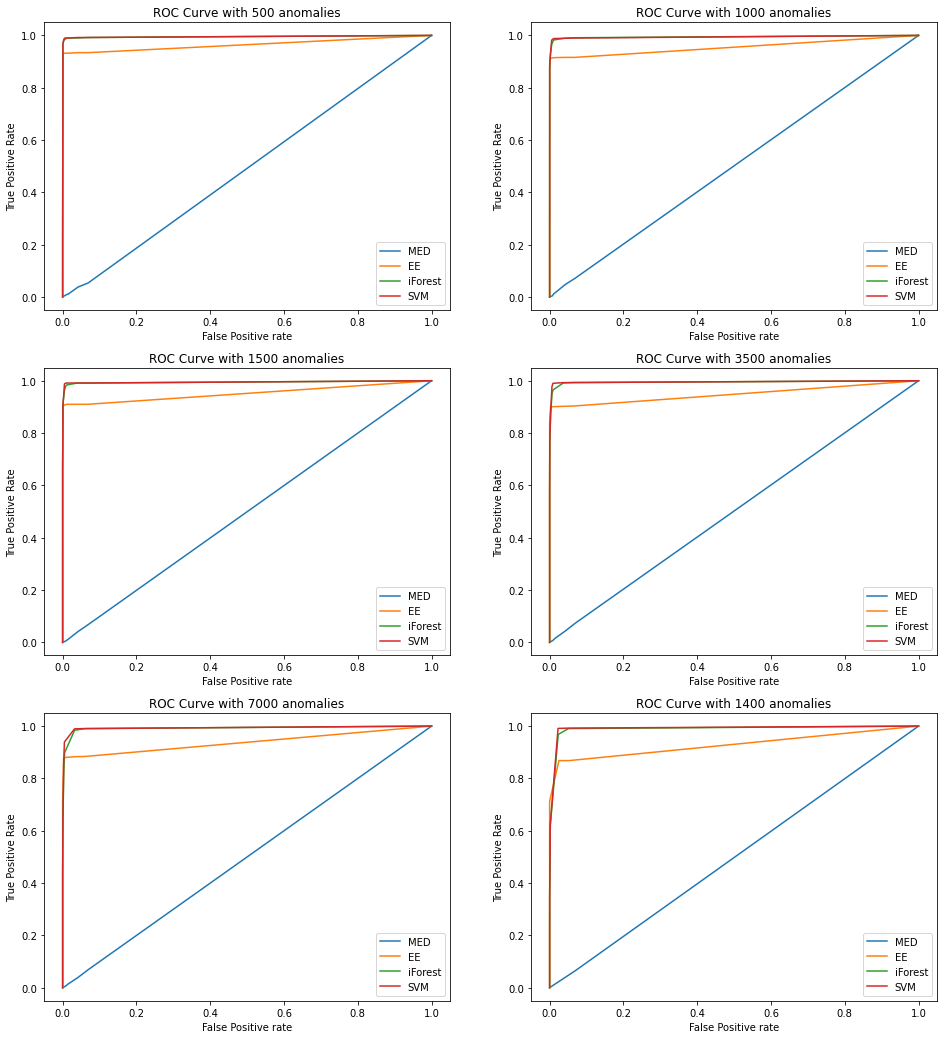

In [3]:
fig = plt.figure(figsize = (16, 18))
plt.subplot(3, 2, 1)
plt.plot([0] + FP_MED[0], [0] + TP_MED[0], label = 'MED')
plt.plot([0] + FP_EE[0], [0] + TP_EE[0], label = 'EE')
plt.plot([0] + FP_ISOF[0], [0] + TP_ISOF[0], label = 'iForest')
plt.plot([0] + FP_SVM[0], [0] + TP_SVM[0], label = 'SVM')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 500 anomalies')

plt.subplot(3, 2, 2)
plt.plot([0] + FP_MED[1], [0] + TP_MED[1], label = 'MED')
plt.plot([0] + FP_EE[1], [0] + TP_EE[1], label = 'EE')
plt.plot([0] + FP_ISOF[1], [0] + TP_ISOF[1], label = 'iForest')
plt.plot([0] + FP_SVM[1], [0] + TP_SVM[1], label = 'SVM')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 1000 anomalies')

plt.subplot(3, 2, 3)
plt.plot([0] + FP_MED[2], [0] + TP_MED[2], label = 'MED')
plt.plot([0] + FP_EE[2], [0] + TP_EE[2], label = 'EE')
plt.plot([0] + FP_ISOF[2], [0] + TP_ISOF[2], label = 'iForest')
plt.plot([0] + FP_SVM[2], [0] + TP_SVM[2], label = 'SVM')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 1500 anomalies')


plt.subplot(3, 2, 4)
plt.plot([0] + FP_MED[3], [0] + TP_MED[3], label = 'MED')
plt.plot([0] + FP_EE[3], [0] + TP_EE[3], label = 'EE')
plt.plot([0] + FP_ISOF[3], [0] + TP_ISOF[3], label = 'iForest')
plt.plot([0] + FP_SVM[3], [0] + TP_SVM[3], label = 'SVM')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 3500 anomalies')

plt.subplot(3, 2, 5)
plt.plot([0] + FP_MED[4], [0] + TP_MED[4], label = 'MED')
plt.plot([0] + FP_EE[4], [0] + TP_EE[4], label = 'EE')
plt.plot([0] + FP_ISOF[4], [0] + TP_ISOF[4], label = 'iForest')
plt.plot([0] + FP_SVM[4], [0] + TP_SVM[4], label = 'SVM')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 7000 anomalies')

plt.subplot(3, 2, 6)
plt.plot([0] + FP_MED[5], [0] + TP_MED[5], label = 'MED')
plt.plot([0] + FP_EE[5], [0] + TP_EE[5], label = 'EE')
plt.plot([0] + FP_ISOF[5], [0] + TP_ISOF[5], label = 'iForest')
plt.plot([0] + FP_SVM[5], [0] + TP_SVM[5], label = 'SVM')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 1400 anomalies')